In [1]:
# Cell 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from scipy.sparse import hstack

In [12]:
# Cell 2: Load and explore the dataset
df = pd.read_csv('C:/Users/Administrator/Downloads/final(2).csv/final(2).csv')

print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
display(df.head())
print("\nData types and missing values:")
print(df.info())
print("\nUnique values in 'Threats' column:", df['Threats'].unique())
print("\nUnique values in 'Family' column:", df['Family'].unique())

Dataset shape: (149043, 14)

First 5 rows:


,Time,Protcol,Flag,Family,Clusters,SeddAddress,ExpAddress,BTC,USD,Netflow_Bytes,IPaddress,Threats,Port,Prediction
0,50,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,500,5,A,Bonet,5061,SS
1,40,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,504,8,A,Bonet,5061,SS
2,30,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,508,7,A,Bonet,5061,SS
3,20,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,512,15,A,Bonet,5061,SS
4,57,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,516,9,A,Bonet,5061,SS



Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149043 entries, 0 to 149042
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Time           149043 non-null  int64 
 1   Protcol        149043 non-null  object
 2   Flag           149043 non-null  object
 3   Family         149043 non-null  object
 4   Clusters       149043 non-null  int64 
 5   SeddAddress    149043 non-null  object
 6   ExpAddress     149043 non-null  object
 7   BTC            149043 non-null  int64 
 8   USD            149043 non-null  int64 
 9   Netflow_Bytes  149043 non-null  int64 
 10  IPaddress      149043 non-null  object
 11  Threats        149043 non-null  object
 12  Port           149043 non-null  int64 
 13  Prediction     149043 non-null  object
dtypes: int64(6), object(8)
memory usage: 15.9+ MB
None

Unique values in 'Threats' column: ['Bonet' 'DoS' 'Spam' 'Blacklist' 'SSH' 'UDP Scan' 'Scan' 'Ne

In [13]:
# Cell 3: Data Preprocessing
# Create binary labels (1 = malicious, 0 = benign)
df['label'] = df['Threats'].apply(lambda x: 1 if x in ['Bonet', 'DoS', 'Spam', 'Blacklist'] else 0)

# Combine relevant text features
df['text_features'] = df['Family'] + ' ' + df['Flag'] + ' ' + df['Threats'].fillna('')

# Display label distribution
print("Label distribution:")
print(df['label'].value_counts())

Label distribution:
label
0    80226
1    68817
Name: count, dtype: int64


In [14]:
# Cell 4: Text Vectorization
tfidf = TfidfVectorizer(max_features=1000, stop_words='english')
X_text = tfidf.fit_transform(df['text_features'])

print("\nText features shape:", X_text.shape)


Text features shape: (149043, 34)


In [15]:
# Cell 5: Prepare numerical features
num_features = df[['Time', 'BTC', 'USD', 'Netflow_Bytes', 'Port']]
X_num = num_features.values

print("\nNumerical features shape:", X_num.shape)


Numerical features shape: (149043, 5)


In [16]:
# Cell 6: Combine features and split data
X = hstack([X_text, X_num])
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

print("\nTraining set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (104330, 39)
Test set shape: (44713, 39)


In [17]:
# Cell 7: Model Training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

print("Model training completed.")

Model training completed.


In [18]:
# Cell 8: Model Evaluation
y_pred = model.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nAccuracy:", accuracy_score(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23991
           1       1.00      1.00      1.00     20722

    accuracy                           1.00     44713
   macro avg       1.00      1.00      1.00     44713
weighted avg       1.00      1.00      1.00     44713


Confusion Matrix:
[[23991     0]
 [    0 20722]]

Accuracy: 1.0



Top 10 Important Features:


,feature,importance
27,scan,0.168832
30,ssh,0.160460
29,spam,0.111229
9,bonet,0.084439
8,blacklist,0.082364
15,dos,0.062511
28,scanning,0.058653
24,port,0.057946
22,nerisbonet,0.039307
32,udp,0.037736


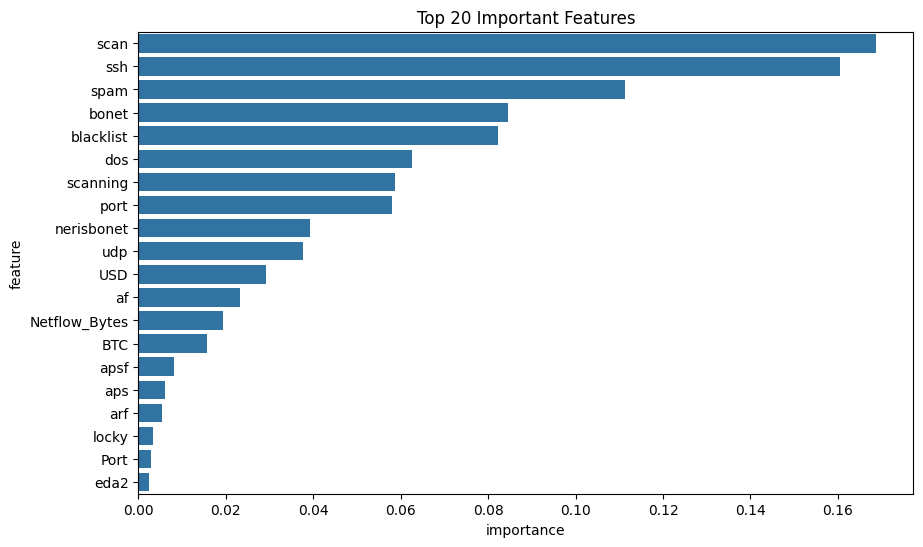

In [19]:
# Cell 9: Feature Importance
feature_importances = pd.DataFrame({
    'feature': list(tfidf.get_feature_names_out()) + list(num_features.columns),
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 10 Important Features:")
display(feature_importances.head(10))

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', 
           data=feature_importances.head(20))
plt.title('Top 20 Important Features')
plt.show()

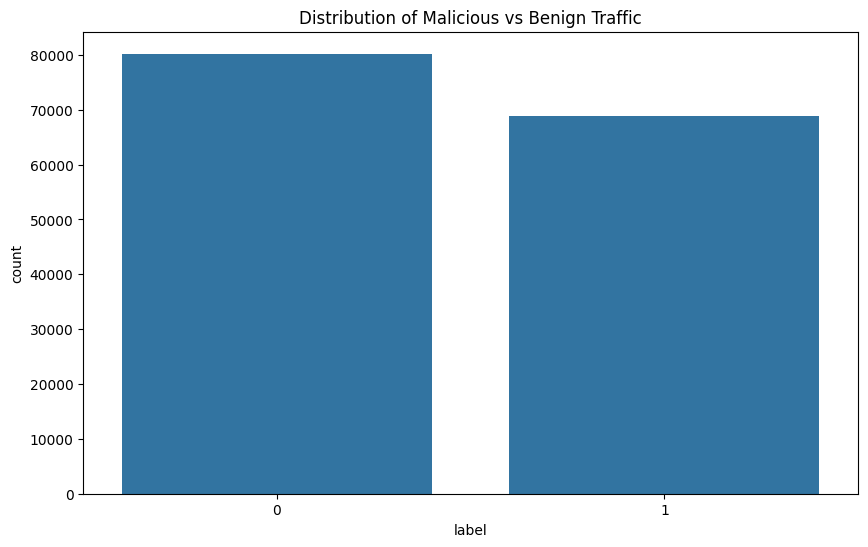

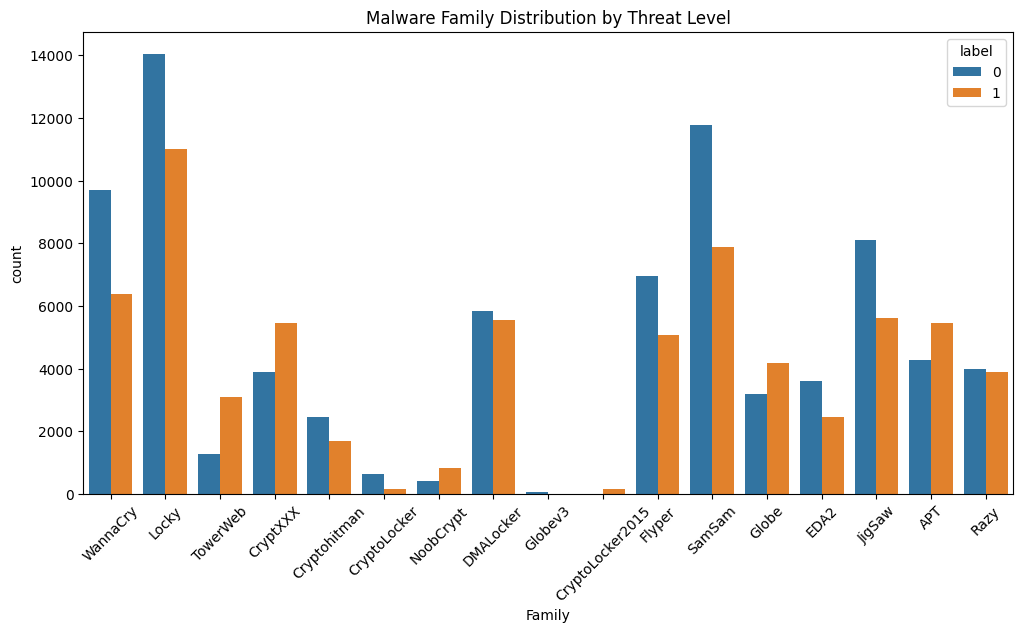

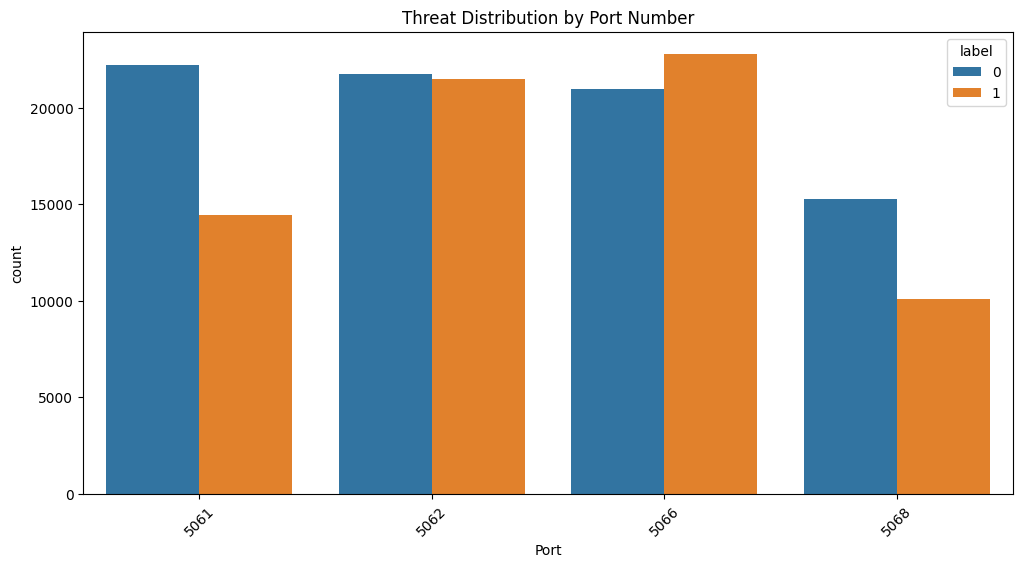

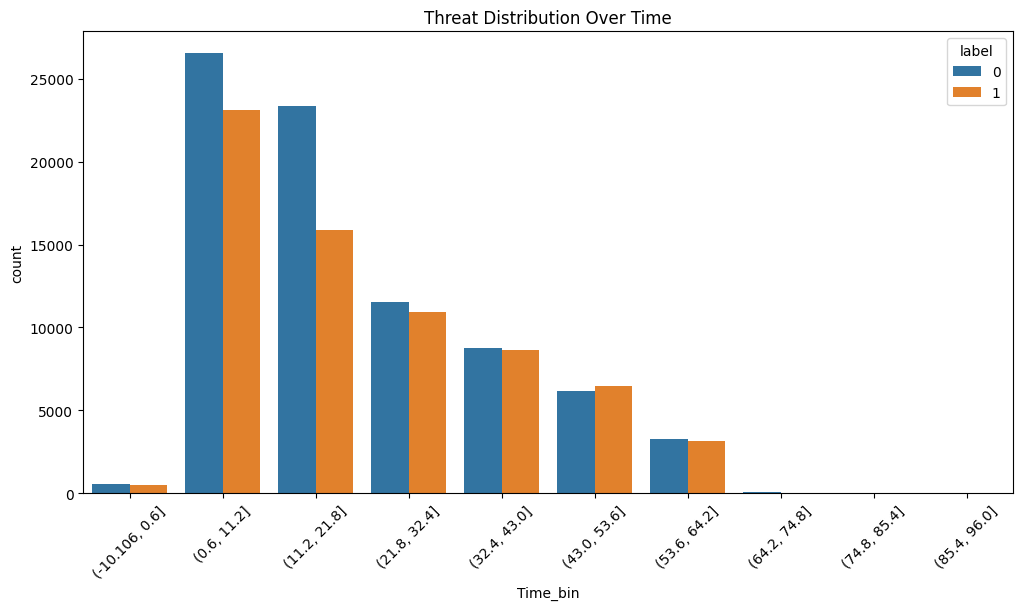

In [21]:
# Cell 10: Visualizations
# Threat distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='label', data=df)
plt.title('Distribution of Malicious vs Benign Traffic')
plt.show()

# Malware family distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='Family', hue='label', data=df)
plt.title('Malware Family Distribution by Threat Level')
plt.xticks(rotation=45)
plt.show()

# Threat distribution by port
plt.figure(figsize=(12, 6))
sns.countplot(x='Port', hue='label', data=df)
plt.title('Threat Distribution by Port Number')
plt.xticks(rotation=45)
plt.show()

# Temporal patterns
df['Time_bin'] = pd.cut(df['Time'], bins=10)
plt.figure(figsize=(12, 6))
sns.countplot(x='Time_bin', hue='label', data=df)
plt.title('Threat Distribution Over Time')
plt.xticks(rotation=45)
plt.show()

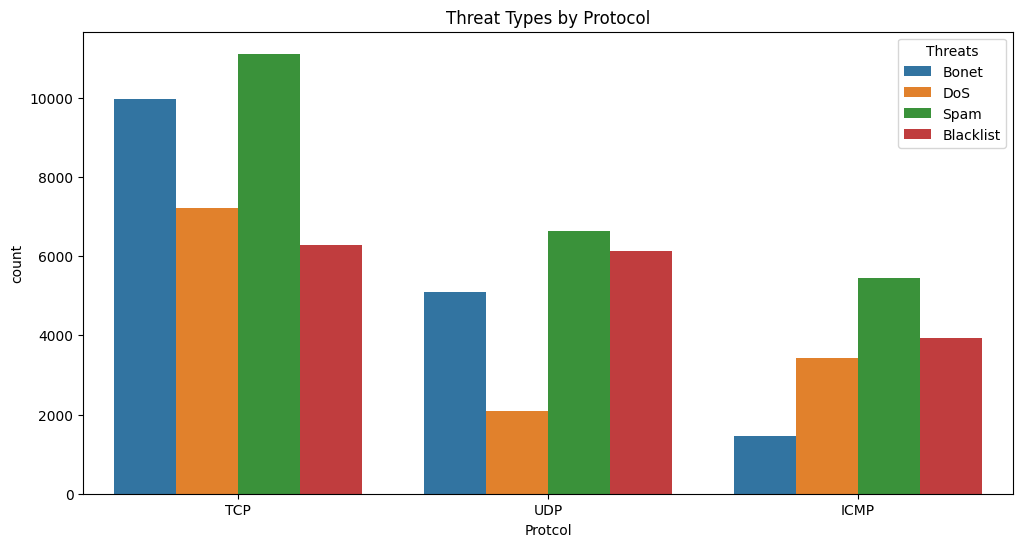

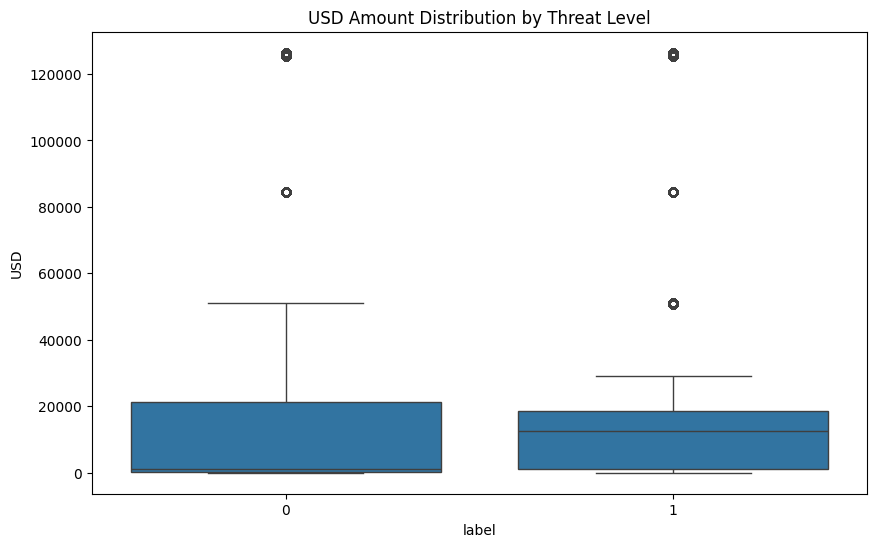

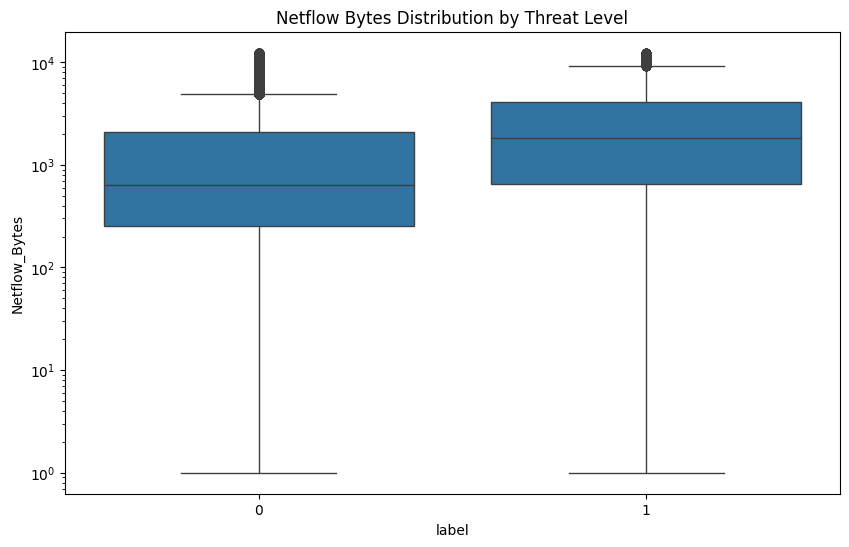

In [22]:
# Cell 11: Advanced Analysis - Threat Characteristics
# Analyze threat types by protocol
plt.figure(figsize=(12, 6))
sns.countplot(x='Protcol', hue='Threats', data=df[df['label'] == 1])
plt.title('Threat Types by Protocol')
plt.show()

# Analyze USD amounts for malicious vs benign
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='USD', data=df)
plt.title('USD Amount Distribution by Threat Level')
plt.show()

# Netflow bytes analysis
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='Netflow_Bytes', data=df)
plt.title('Netflow Bytes Distribution by Threat Level')
plt.yscale('log')  # Using log scale due to wide range
plt.show()